<a href="https://colab.research.google.com/github/Mandloi1/projectwork/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('Sample_data.csv')
data

,PART#,X_FERET,Y_FERET,DAVE,DMAX,DMIN,DPERP,ASPECT,AREA,PERIMETER,Mg,Al,Mg/Al,Class
0,1,2.99990,3.58322,3.29594,3.76466,2.58417,2.58417,1.45682,6.98565,12.001600,0.020279,0.062260,0.325709,0.0
1,2,2.33326,2.08327,2.27187,2.66788,1.48360,1.48360,1.79825,2.77760,7.742380,0.020724,0.055203,0.375406,0.0
2,3,7.83308,6.83311,7.25698,7.81399,6.81158,6.81158,1.14716,34.69220,29.452801,0.021017,0.053570,0.392320,0.0
3,4,1.83327,1.74994,1.73706,1.79886,1.73710,1.73710,1.03556,2.20124,6.644780,0.020140,0.061045,0.329927,0.0
4,5,7.33309,8.41639,8.39133,8.94592,5.48010,6.61726,1.63244,35.86570,34.866798,0.020244,0.060383,0.335254,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,460,2.91657,2.91657,2.88842,3.16766,2.68319,2.68319,1.18056,6.08988,11.335000,0.020551,0.058200,0.353107,0.0
441,461,1.83327,2.66658,2.35166,2.68991,1.23653,1.49468,2.17537,2.80537,7.791190,0.020426,0.058358,0.350002,0.0
442,462,1.58328,1.66661,1.61402,1.76771,1.35524,1.35524,1.30435,1.77766,6.055550,0.019970,0.061858,0.322826,0.0
443,463,3.74988,4.49985,4.23152,4.74472,3.50952,3.50952,1.35196,12.02000,16.085800,0.020689,0.057645,0.358899,0.0


In [ ]:
data.describe()

,PART#,X_FERET,Y_FERET,DAVE,DMAX,DMIN,DPERP,ASPECT,AREA,PERIMETER,Mg,Al,Mg/Al,Class
count,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,399.000000,399.000000,399.000000,399.000000
mean,233.368539,3.814482,3.84744,4.042531,4.453338,3.006950,3.049864,1.547912,10.721819,15.625505,0.018165,0.065409,0.317890,0.112782
std,134.423708,2.174945,1.93912,2.182365,2.393232,1.666569,1.665404,0.563177,15.642454,10.176547,0.005677,0.035771,0.156374,0.316723
min,1.000000,1.249960,1.24996,1.274790,1.455310,0.668402,0.668402,1.006800,1.034650,5.132990,0.000000,0.004882,0.000000,0.000000
25%,118.000000,2.333260,2.58325,2.624190,2.892660,1.976360,2.016900,1.200000,3.958070,9.774370,0.019746,0.055792,0.313304,0.000000
50%,232.000000,3.333220,3.41655,3.527210,3.836830,2.732950,2.751280,1.368420,6.867610,13.005100,0.020426,0.058401,0.347234,0.000000
75%,350.000000,4.499850,4.41652,4.726760,5.324040,3.597610,3.725560,1.695230,13.311600,18.488100,0.020730,0.062511,0.367576,0.000000
max,464.000000,19.832701,16.83280,18.147800,19.767500,16.858801,16.858801,5.076360,218.263000,118.197998,0.021350,0.263996,2.022765,1.000000


In [ ]:
data.shape

(445, 14)

In [ ]:
data.isna().sum()

PART#         0
X_FERET       0
Y_FERET       0
DAVE          0
DMAX          0
DMIN          0
DPERP         0
ASPECT        0
AREA          0
PERIMETER     0
Mg           46
Al           46
Mg/Al        46
Class        46
dtype: int64

In [ ]:
data = data.dropna()
data.shape

(399, 14)

In [ ]:
print(data.isna().sum())

PART#        0
X_FERET      0
Y_FERET      0
DAVE         0
DMAX         0
DMIN         0
DPERP        0
ASPECT       0
AREA         0
PERIMETER    0
Mg           0
Al           0
Mg/Al        0
Class        0
dtype: int64


In [ ]:
data= data.drop(['PART#', 'DPERP', 'Mg', 'Al', 'Mg/Al'], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fdb4cc7b8>,
      dtype=object)

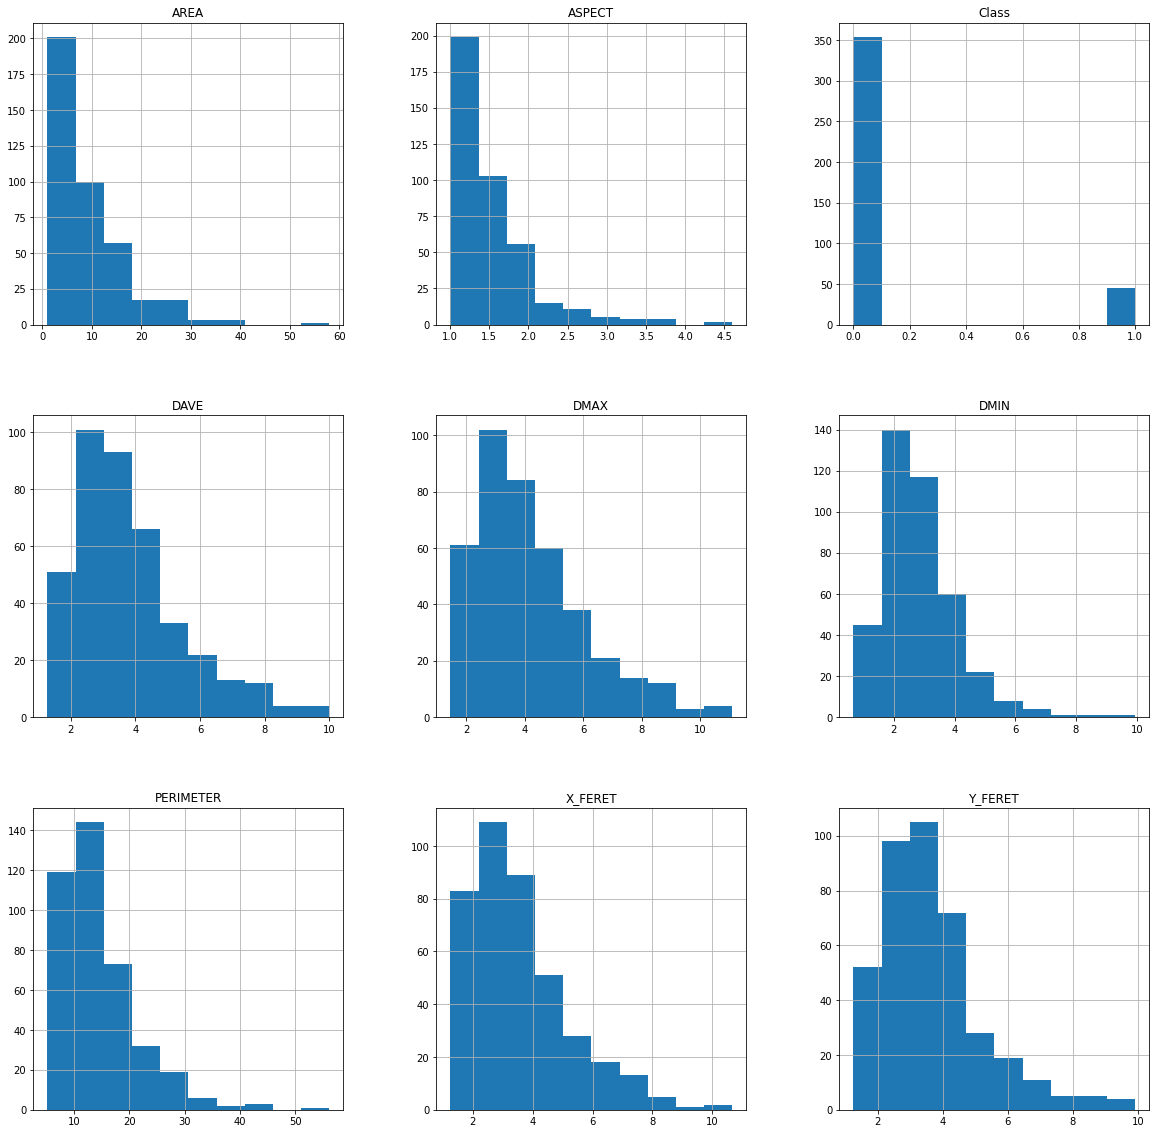

In [ ]:
data.hist(figsize=(20,20))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 444
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X_FERET    399 non-null    float64
 1   Y_FERET    399 non-null    float64
 2   DAVE       399 non-null    float64
 3   DMAX       399 non-null    float64
 4   DMIN       399 non-null    float64
 5   ASPECT     399 non-null    float64
 6   AREA       399 non-null    float64
 7   PERIMETER  399 non-null    float64
 8   Class      399 non-null    float64
dtypes: float64(9)
memory usage: 31.2 KB


0.0    354
1.0     45
Name: Class, dtype: int64


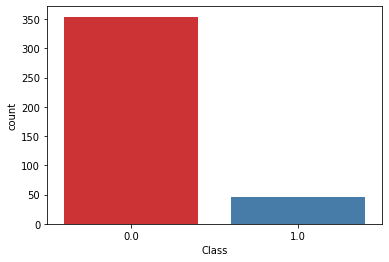

In [ ]:
print(data.Class.value_counts())
sns.countplot(data['Class'], palette='Set1')
plt.show()

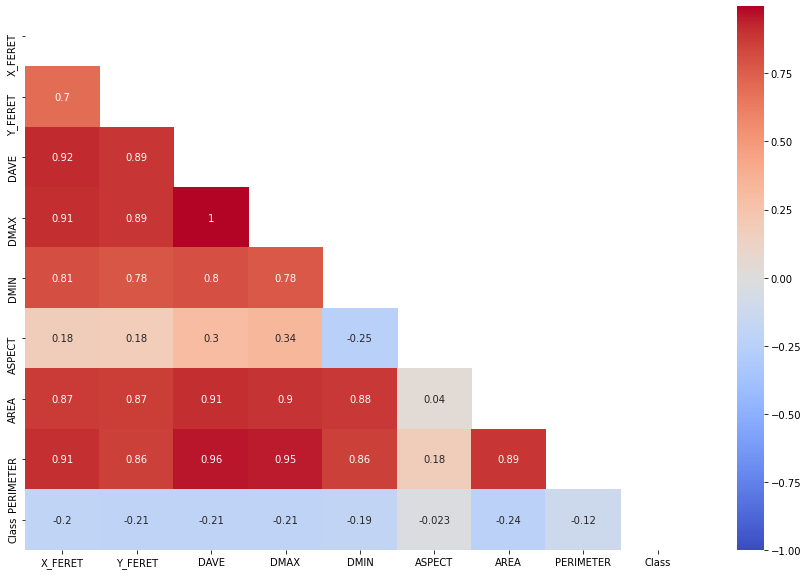

In [ ]:
plt.figure(figsize=(15,10))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), vmin = -1, cmap = 'coolwarm', annot = True, mask=mask)
plt.show()

In [ ]:
data = data[['ASPECT', 'AREA', 'Class']]
data.head()

,ASPECT,AREA,Class
0,1.45682,6.98565,0.0
1,1.79825,2.77760,0.0
2,1.14716,34.69220,0.0
3,1.03556,2.20124,0.0
4,1.63244,35.86570,0.0


In [ ]:
x = data.drop(['Class'], axis = 1)
y = data['Class']
print(x,y)

      ASPECT      AREA
0    1.45682   6.98565
1    1.79825   2.77760
2    1.14716  34.69220
3    1.03556   2.20124
4    1.63244  35.86570
..       ...       ...
440  1.18056   6.08988
441  2.17537   2.80537
442  1.30435   1.77766
443  1.35196  12.02000
444  1.17761   6.22876

[399 rows x 2 columns] 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
440    0.0
441    0.0
442    0.0
443    0.0
444    0.0
Name: Class, Length: 399, dtype: float64


In [ ]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


After min max Scaling : 
 [[0.12526163 0.10459977]
 [0.22029758 0.03063555]
 [0.03906876 0.59159334]
 [0.00800524 0.02050497]
 [0.17414489 0.61221977]
 [0.12454906 0.26473446]
 [0.07288787 0.01000843]
 [0.11817771 0.0401557 ]
 [0.12579884 0.24398499]
 [0.29667595 0.61266444]
 [0.171971   0.27498703]
 [0.02614233 0.08433895]
 [0.06627436 0.        ]
 [0.16408545 0.50395874]
 [0.26360279 0.30952726]
 [0.05551625 0.04784504]
 [0.96776468 0.11375379]
 [0.4131613  0.15342121]
 [0.11438104 0.2402007 ]
 [0.24412965 0.1136318 ]
 [0.20656119 0.00768952]
 [0.01866869 0.36937815]
 [0.0630539  0.02831646]
 [0.08672172 0.200412  ]
 [0.0684093  0.02843845]
 [0.14082958 0.11619486]
 [0.11284457 0.26937123]
 [0.29107285 0.03966741]
 [0.71448847 0.07994509]
 [0.24195576 0.02965898]
 [0.1916223  0.0572432 ]
 [0.08071779 0.00976429]
 [0.07878884 0.03380887]
 [0.46801515 0.12681356]
 [0.2953037  0.17172836]
 [0.19326177 0.01867416]
 [0.29490565 0.43341235]
 [0.06924988 0.08092148]
 [0.15116738 0.0615149 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg =LogisticRegression(random_state=1)

logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Test set accuracy:{:.2f}".format(acc))

Test set accuracy:0.88


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


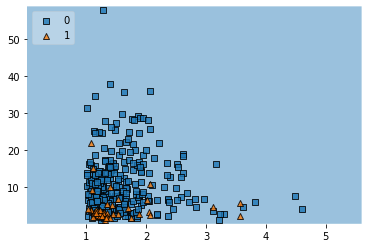

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values, y.astype(np.integer).values, clf = logreg, legend=2)

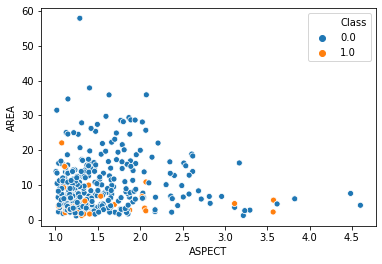

In [ ]:
sns.scatterplot(data.ASPECT, data['AREA'],hue = data.Class)

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
# Instantiating the classifier and fitting it 
xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Applying classifier on train (seen) set
predictions = xgb_clf.predict(x_train)
# accuracy score
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')

90.28 %


In [ ]:
# Applying classifier on test (unseen) set
predictions = xgb_clf.predict(x_test)
# accuracy score
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

88.75 %


In [ ]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))
# plot roc auc

[[70  0]
 [ 9  1]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        70
         1.0       1.00      0.10      0.18        10

    accuracy                           0.89        80
   macro avg       0.94      0.55      0.56        80
weighted avg       0.90      0.89      0.84        80



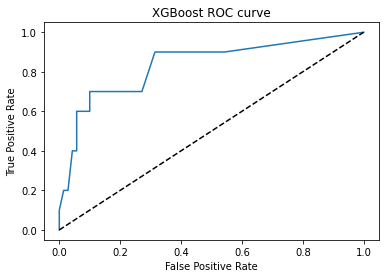

In [ ]:
from sklearn.metrics import roc_curve  
probs = xgb_clf.predict_proba(x_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

**Visualizing the effect of parameter tuning**

In [103]:
data1 =pd.read_csv('Sample_data.csv')
data1

,PART#,X_FERET,Y_FERET,DAVE,DMAX,DMIN,DPERP,ASPECT,AREA,PERIMETER,Mg,Al,Mg/Al,Class
0,1,2.99990,3.58322,3.29594,3.76466,2.58417,2.58417,1.45682,6.98565,12.001600,0.020279,0.062260,0.325709,0.0
1,2,2.33326,2.08327,2.27187,2.66788,1.48360,1.48360,1.79825,2.77760,7.742380,0.020724,0.055203,0.375406,0.0
2,3,7.83308,6.83311,7.25698,7.81399,6.81158,6.81158,1.14716,34.69220,29.452801,0.021017,0.053570,0.392320,0.0
3,4,1.83327,1.74994,1.73706,1.79886,1.73710,1.73710,1.03556,2.20124,6.644780,0.020140,0.061045,0.329927,0.0
4,5,7.33309,8.41639,8.39133,8.94592,5.48010,6.61726,1.63244,35.86570,34.866798,0.020244,0.060383,0.335254,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,460,2.91657,2.91657,2.88842,3.16766,2.68319,2.68319,1.18056,6.08988,11.335000,0.020551,0.058200,0.353107,0.0
441,461,1.83327,2.66658,2.35166,2.68991,1.23653,1.49468,2.17537,2.80537,7.791190,0.020426,0.058358,0.350002,0.0
442,462,1.58328,1.66661,1.61402,1.76771,1.35524,1.35524,1.30435,1.77766,6.055550,0.019970,0.061858,0.322826,0.0
443,463,3.74988,4.49985,4.23152,4.74472,3.50952,3.50952,1.35196,12.02000,16.085800,0.020689,0.057645,0.358899,0.0


In [104]:
data1= data1.drop(['PART#', 'DPERP', 'Mg', 'Al', 'Mg/Al'], axis = 1)

In [105]:
data1

,X_FERET,Y_FERET,DAVE,DMAX,DMIN,ASPECT,AREA,PERIMETER,Class
0,2.99990,3.58322,3.29594,3.76466,2.58417,1.45682,6.98565,12.001600,0.0
1,2.33326,2.08327,2.27187,2.66788,1.48360,1.79825,2.77760,7.742380,0.0
2,7.83308,6.83311,7.25698,7.81399,6.81158,1.14716,34.69220,29.452801,0.0
3,1.83327,1.74994,1.73706,1.79886,1.73710,1.03556,2.20124,6.644780,0.0
4,7.33309,8.41639,8.39133,8.94592,5.48010,1.63244,35.86570,34.866798,0.0
...,...,...,...,...,...,...,...,...,...
440,2.91657,2.91657,2.88842,3.16766,2.68319,1.18056,6.08988,11.335000,0.0
441,1.83327,2.66658,2.35166,2.68991,1.23653,2.17537,2.80537,7.791190,0.0
442,1.58328,1.66661,1.61402,1.76771,1.35524,1.30435,1.77766,6.055550,0.0
443,3.74988,4.49985,4.23152,4.74472,3.50952,1.35196,12.02000,16.085800,0.0


In [107]:
data1 =data1.dropna()
data1

,X_FERET,Y_FERET,DAVE,DMAX,DMIN,ASPECT,AREA,PERIMETER,Class
0,2.99990,3.58322,3.29594,3.76466,2.58417,1.45682,6.98565,12.001600,0.0
1,2.33326,2.08327,2.27187,2.66788,1.48360,1.79825,2.77760,7.742380,0.0
2,7.83308,6.83311,7.25698,7.81399,6.81158,1.14716,34.69220,29.452801,0.0
3,1.83327,1.74994,1.73706,1.79886,1.73710,1.03556,2.20124,6.644780,0.0
4,7.33309,8.41639,8.39133,8.94592,5.48010,1.63244,35.86570,34.866798,0.0
...,...,...,...,...,...,...,...,...,...
440,2.91657,2.91657,2.88842,3.16766,2.68319,1.18056,6.08988,11.335000,0.0
441,1.83327,2.66658,2.35166,2.68991,1.23653,2.17537,2.80537,7.791190,0.0
442,1.58328,1.66661,1.61402,1.76771,1.35524,1.30435,1.77766,6.055550,0.0
443,3.74988,4.49985,4.23152,4.74472,3.50952,1.35196,12.02000,16.085800,0.0


In [109]:
X = data1.drop(['Class'], axis = 1)
Y = data1['Class']
print(X,Y)

     X_FERET  Y_FERET     DAVE     DMAX     DMIN   ASPECT      AREA  PERIMETER
0    2.99990  3.58322  3.29594  3.76466  2.58417  1.45682   6.98565  12.001600
1    2.33326  2.08327  2.27187  2.66788  1.48360  1.79825   2.77760   7.742380
2    7.83308  6.83311  7.25698  7.81399  6.81158  1.14716  34.69220  29.452801
3    1.83327  1.74994  1.73706  1.79886  1.73710  1.03556   2.20124   6.644780
4    7.33309  8.41639  8.39133  8.94592  5.48010  1.63244  35.86570  34.866798
..       ...      ...      ...      ...      ...      ...       ...        ...
440  2.91657  2.91657  2.88842  3.16766  2.68319  1.18056   6.08988  11.335000
441  1.83327  2.66658  2.35166  2.68991  1.23653  2.17537   2.80537   7.791190
442  1.58328  1.66661  1.61402  1.76771  1.35524  1.30435   1.77766   6.055550
443  3.74988  4.49985  4.23152  4.74472  3.50952  1.35196  12.02000  16.085800
444  2.74991  2.99990  2.97611  3.25416  2.76337  1.17761   6.22876  11.217100

[399 rows x 8 columns] 0      0.0
1      0.0
2     

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 123)

In [111]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, Y_train) # print(rfc)

    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)

    train_scores.append(round(accuracy_score(Y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(Y_test, test_predictions), 2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))
# plot the loss as well

The training scores were: [0.96, 0.94, 0.96, 0.97, 0.98, 0.98, 0.99, 1.0]
The testing scores were: [0.89, 0.91, 0.89, 0.88, 0.89, 0.9, 0.89, 0.89]


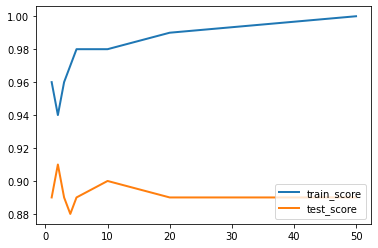

In [112]:
z = [1, 2, 3, 4, 5, 10, 20, 50]
plt.plot(z, train_scores, linewidth=2)
plt.plot(z, test_scores, linewidth=2)
plt.legend(['train_score', 'test_score'], loc='lower right')